# Genpact

## Description problem

We have to predict the number of orders for the next weeks.

**Data**

1. Train: 

    * id
    *  week
    * center_id
    * meal_id
    * checkout_price: After discounts
    * base_price
    * emailer_for_promotion: boolean (0, 1)
    * homepage_featured: boolean (0, 1)
    * num_orders: label


2. Meals
    * category: categorical
    * cuisine: categorical
    
    
3. Center
    * city_code
    * region_code
    * center_type
    * op_area

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

pd.options.display.float_format = '{:.1f}'.format

## Exploratory Data Analysis

In [17]:
train = pd.read_csv('train_GzS76OK/train.csv')

In [18]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,456548.0,456548.0,456548.0,456548.0,456548.0,456548.0,456548.0,456548.0,456548.0
mean,1250096.3,74.8,82.1,2024.3,332.2,354.2,0.1,0.1,261.9
std,144354.8,41.5,46.0,547.4,152.9,160.7,0.3,0.3,395.9
min,1000000.0,1.0,10.0,1062.0,3.0,55.4,0.0,0.0,13.0
25%,1124998.8,39.0,43.0,1558.0,228.9,243.5,0.0,0.0,54.0
50%,1250183.5,76.0,76.0,1993.0,296.8,310.5,0.0,0.0,136.0
75%,1375140.2,111.0,110.0,2539.0,445.2,458.9,0.0,0.0,324.0
max,1499999.0,145.0,186.0,2956.0,866.3,866.3,1.0,1.0,24299.0


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [20]:
train.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

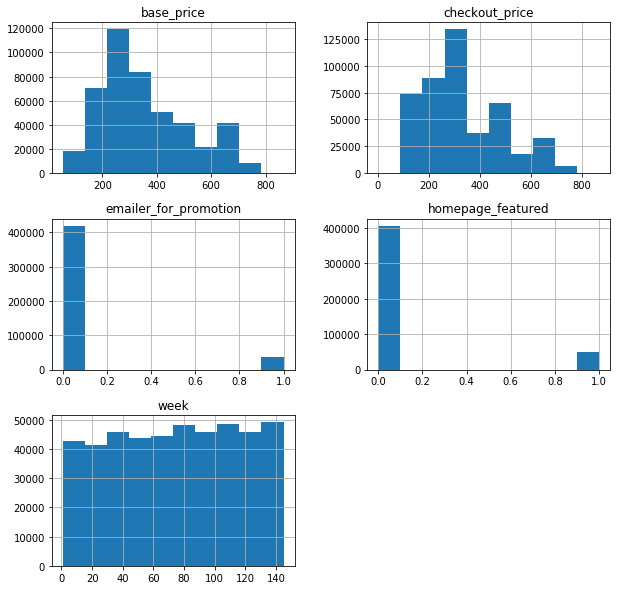

In [21]:
viz = train[['week','checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']]
viz.hist(figsize = (10,10))
plt.show()

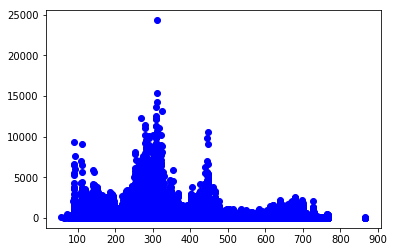

In [22]:
plt.scatter(train.base_price, train.num_orders, color = 'blue')

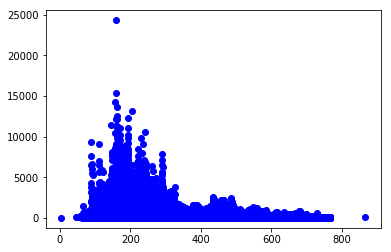

In [23]:
plt.scatter(train.checkout_price, train.num_orders, color = 'blue')

In [24]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.8,152.3,0,0,177
1,1466964,1,55,1993,136.8,135.8,0,0,270
2,1346989,1,55,2539,134.9,135.9,0,0,189
3,1338232,1,55,2139,339.5,437.5,0,0,54
4,1448490,1,55,2631,243.5,242.5,0,0,40


In [25]:
meals = pd.read_csv('train_GzS76OK/meal_info.csv')

In [26]:
train_meal = pd.merge(train, meals, on = 'meal_id')

In [27]:
train_meal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.8,152.3,0,0,177,Beverages,Thai
1,1040403,1,24,1885,136.8,136.8,0,0,1498,Beverages,Thai
2,1103215,1,11,1885,136.8,136.8,0,0,959,Beverages,Thai
3,1034383,1,83,1885,121.3,120.3,0,1,1025,Beverages,Thai
4,1118999,1,32,1885,114.5,113.5,0,1,445,Beverages,Thai


In [28]:
train_meal['category'].unique()

array(['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich',
       'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert',
       'Soup', 'Salad', 'Fish'], dtype=object)

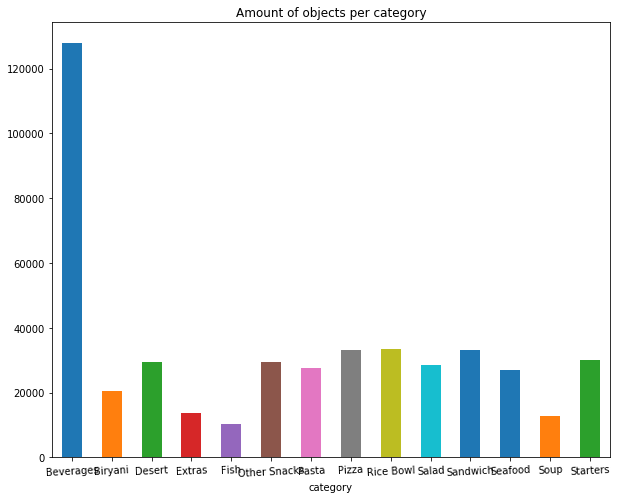

In [29]:
train_meal.groupby(['category']).size().plot.bar(title = 'Amount of objects per category', figsize=(10,8), rot = 3)
plt.show()

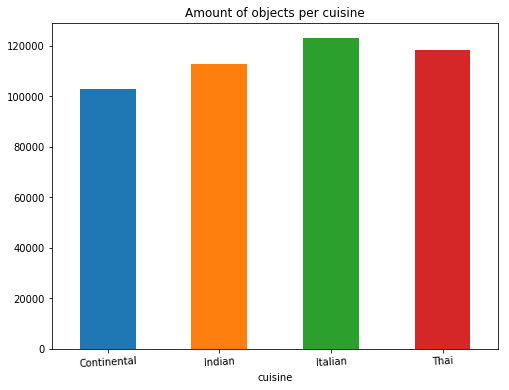

In [30]:
train_meal.groupby(['cuisine']).size().plot.bar(title = 'Amount of objects per cuisine', figsize=(8,6), rot = 3)
plt.show()

In [31]:
center = pd.read_csv('train_GzS76OK/fulfilment_center_info.csv')

In [32]:
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


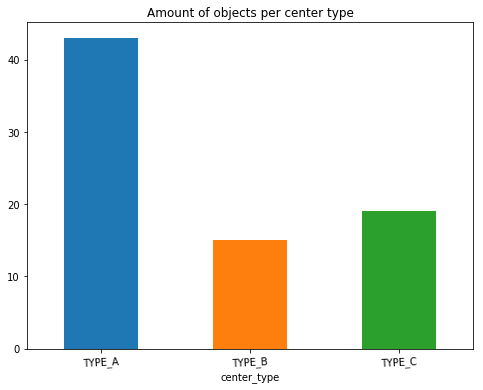

In [33]:
center.groupby(['center_type']).size().plot.bar(title = 'Amount of objects per center type', figsize=(8,6), rot = 3)
plt.show()

In [34]:
train_complete = pd.merge(train_meal, center, on = 'center_id')

In [35]:
train_complete.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.8,152.3,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.8,152.3,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.9,133.9,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.9,134.9,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.5,147.5,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [36]:
train_complete.drop(['id', 'center_id', 'meal_id'], axis = 1, inplace = True)
train_complete.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1,136.8,152.3,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,2,135.8,152.3,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,3,132.9,133.9,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,4,135.9,134.9,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,5,146.5,147.5,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [37]:
train_complete.describe(include = 'all')

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
count,456548.0,456548.0,456548.0,456548.0,456548.0,456548.0,456548,456548,456548.0,456548.0,456548,456548.0
unique,nan,nan,nan,nan,nan,nan,14,4,nan,nan,3,nan
top,nan,nan,nan,nan,nan,nan,Beverages,Italian,nan,nan,TYPE_A,nan
freq,nan,nan,nan,nan,nan,nan,127890,122925,nan,nan,262881,nan
mean,74.8,332.2,354.2,0.1,0.1,261.9,NaN,NaN,601.6,56.6,NaN,4.1
std,41.5,152.9,160.7,0.3,0.3,395.9,NaN,NaN,66.2,17.6,NaN,1.1
min,1.0,3.0,55.4,0.0,0.0,13.0,NaN,NaN,456.0,23.0,NaN,0.9
25%,39.0,228.9,243.5,0.0,0.0,54.0,NaN,NaN,553.0,34.0,NaN,3.6
50%,76.0,296.8,310.5,0.0,0.0,136.0,NaN,NaN,596.0,56.0,NaN,4.0
75%,111.0,445.2,458.9,0.0,0.0,324.0,NaN,NaN,651.0,77.0,NaN,4.5


In [38]:
train_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 12 columns):
week                     456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
category                 456548 non-null object
cuisine                  456548 non-null object
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 45.3+ MB


In [39]:
train_complete = pd.get_dummies(train_complete, columns = ['category', 'cuisine', 'center_type'])

In [40]:
train_complete.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,category_Beverages,...,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
0,1,136.8,152.3,0,0,177,647,56,2.0,1,...,0,0,0,0,0,0,1,0,0,1
1,2,135.8,152.3,0,0,323,647,56,2.0,1,...,0,0,0,0,0,0,1,0,0,1
2,3,132.9,133.9,0,0,96,647,56,2.0,1,...,0,0,0,0,0,0,1,0,0,1
3,4,135.9,134.9,0,0,163,647,56,2.0,1,...,0,0,0,0,0,0,1,0,0,1
4,5,146.5,147.5,0,0,215,647,56,2.0,1,...,0,0,0,0,0,0,1,0,0,1


In [41]:
train_complete.columns

Index(['week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'num_orders', 'city_code', 'region_code',
       'op_area', 'category_Beverages', 'category_Biryani', 'category_Desert',
       'category_Extras', 'category_Fish', 'category_Other Snacks',
       'category_Pasta', 'category_Pizza', 'category_Rice Bowl',
       'category_Salad', 'category_Sandwich', 'category_Seafood',
       'category_Soup', 'category_Starters', 'cuisine_Continental',
       'cuisine_Indian', 'cuisine_Italian', 'cuisine_Thai',
       'center_type_TYPE_A', 'center_type_TYPE_B', 'center_type_TYPE_C'],
      dtype='object')

## Model development

In [42]:
X = train_complete[['week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'city_code', 'region_code',
       'op_area', 'category_Beverages', 'category_Biryani', 'category_Desert',
       'category_Extras', 'category_Fish', 'category_Other Snacks',
       'category_Pasta', 'category_Pizza', 'category_Rice Bowl',
       'category_Salad', 'category_Sandwich', 'category_Seafood',
       'category_Soup', 'category_Starters', 'cuisine_Continental',
       'cuisine_Indian', 'cuisine_Italian', 'cuisine_Thai',
       'center_type_TYPE_A', 'center_type_TYPE_B', 'center_type_TYPE_C']]
Y = train_complete['num_orders']

print('X shape:' + str(X.shape))
print('Y shape:' + str(Y.shape))

X shape:(456548, 29)
Y shape:(456548,)


In [43]:
from sklearn.preprocessing import StandardScaler
X = preprocessing.StandardScaler().fit(X).transform(X)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 1)

## Neural Network

In [45]:
from sklearn.neural_network import MLPRegressor
ml = MLPRegressor(hidden_layer_sizes = (300, 50), learning_rate = 'adaptive', learning_rate_init = 0.001, verbose = True, max_iter = 1000, batch_size = 128, random_state = 1)

In [46]:
ml.fit(np.asanyarray(X_train), np.asanyarray(Y_train))

Iteration 1, loss = 40054.58753681
Iteration 2, loss = 33306.67355906
Iteration 3, loss = 31558.29951967
Iteration 4, loss = 30060.97747809
Iteration 5, loss = 28603.34439905
Iteration 6, loss = 27172.00830315
Iteration 7, loss = 26171.86054203
Iteration 8, loss = 25367.86708915
Iteration 9, loss = 24682.42736865
Iteration 10, loss = 24131.29637265
Iteration 11, loss = 23648.50677753
Iteration 12, loss = 23208.01020981
Iteration 13, loss = 22868.45851229
Iteration 14, loss = 22475.44979654
Iteration 15, loss = 22108.01221215
Iteration 16, loss = 21866.11040254
Iteration 17, loss = 21652.74956850
Iteration 18, loss = 21349.80125190
Iteration 19, loss = 21099.14431006
Iteration 20, loss = 20937.66661206
Iteration 21, loss = 20794.69433639
Iteration 22, loss = 20590.25301731
Iteration 23, loss = 20374.89814378
Iteration 24, loss = 20280.66648773
Iteration 25, loss = 20150.12335325
Iteration 26, loss = 19937.26870534
Iteration 27, loss = 19846.27634263
Iteration 28, loss = 19694.33979130
I

MLPRegressor(activation='relu', alpha=0.0001, batch_size=128, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 50), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [47]:
y_hat = ml.predict(np.asanyarray(X_test))

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Y_test, y_hat)
r2 = r2_score(Y_test, y_hat)

print('Root mean squared error: ' + str(np.sqrt(mse)))
print('R squared: ' + str(r2))

Root mean squared error: 193.25453848003096
R squared: 0.7648321584764516


## Random forest

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [55]:
#Check how many estimators will provide the best result (lower error)
ns = 100
error = np.zeros((ns-1))

for n in range(1,ns):
#Train Model and Predict
    rfr = RandomForestRegressor(n_estimators = ns).fit(X_train, Y_train)
    
    y_hat = rfr.predict(X_test)
    
    error[n-1] = np.sqrt(mean_squared_error(Y_test, y_hat))
        
error

array([167.04099635, 166.92023969, 166.10425061, 166.96412875,
       167.5173592 , 165.93444402, 167.05474421, 167.26938022,
       165.8948809 , 167.00640037, 167.1604585 , 167.28630607,
       166.95380754, 166.55501095, 167.21983658, 167.04946755,
       167.36428538, 166.58034558, 167.37238251, 168.07887493,
       167.44496112, 167.15039196, 166.18310606, 166.48043664,
       167.36878498, 166.00705894, 166.86268932, 167.35085339,
       166.77360517, 168.74809383, 167.25349241, 166.42446486,
       166.86068002, 166.3321266 , 167.58596259, 167.12797403,
       167.95579721, 166.24445104, 167.19199803, 167.49386063,
       165.75495683, 166.67229027, 168.18696464, 167.12117079,
       167.77924508, 166.36695936, 167.50446458, 166.83107684,
       166.72372566, 167.96099181, 168.1738654 , 166.90575343,
       167.14368727, 166.00694738, 167.03797877, 166.86364034,
       167.44390076, 167.41685475, 167.6720501 , 167.53851857,
       167.25517204, 166.77308116, 166.37947407, 165.80

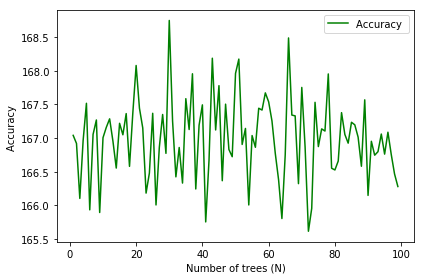

In [56]:
plt.plot(range(1,ns),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of trees (N)')
plt.tight_layout()
plt.show()

In [58]:
#Select the model with lower error (The index is 71, but Python starts with zero so we have to get 72)
np.argmin(mean_acc)

71

In [57]:
rfr = RandomForestRegressor(n_estimators = 72, verbose = True)

In [58]:
rfr.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  2.5min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=72, n_jobs=1,
           oob_score=False, random_state=None, verbose=True,
           warm_start=False)

In [60]:
from sklearn.metrics import mean_squared_error

y_hat = rfr.predict(np.asanyarray(X_test))
mse = mean_squared_error(Y_test, y_hat)
r2 = r2_score(Y_test, y_hat)

print('Root mean squared error: ' + str(np.sqrt(mse)))
print('R squared: ' + str(r2))

Root mean squared error: 167.18852533505495
R squared: 0.8239923827606097


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    2.5s finished


Once we have selected the best model (in this case the Random Forest) we train it with the whole dataset

In [61]:
rfr.fit(X, Y)

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  2.3min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=72, n_jobs=1,
           oob_score=False, random_state=None, verbose=True,
           warm_start=False)

## Permutation Importance

In [72]:
 import eli5
 from eli5.sklearn import PermutationImportance

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [73]:
# CHecking Permutation Importance could be great for post-preprocessing and maybe remove some useless features.
# In this case I tried to remove the 3 least important variables but the error increased
# I did this before thinking aout using Random Forest so I did it using the Multi Layer Perceptron
perm = PermutationImportance(ml).fit(X_test, Y_test)

In [78]:
 eli5.show_weights(perm, feature_names = X.columns.tolist(), top = None)

Weight,Feature
6.7820 ± 0.2056,checkout_price
4.1812 ± 0.1486,category_Rice Bowl
2.5420 ± 0.0482,base_price
2.4019 ± 0.1547,category_Pizza
2.2539 ± 0.0391,category_Beverages
1.2397 ± 0.0581,category_Fish
1.1410 ± 0.0429,cuisine_Indian
1.1405 ± 0.0928,category_Biryani
1.0499 ± 0.0294,op_area
0.7256 ± 0.0438,cuisine_Continental


After seeing Permutation Importance we have decided to remove 'center_type' and 'week' features

## Evaluation

Once we have selected the best model; we proceed to predict the new values with the evaluation set

In [64]:
evaluation = pd.read_csv('test_QoiMO9B.csv')

In [65]:
evaluation.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.1,159.1,0,0
1,1127204,146,55,1993,160.1,159.1,0,0
2,1212707,146,55,2539,157.1,159.1,0,0
3,1082698,146,55,2631,162.0,162.0,0,0
4,1400926,146,55,1248,163.9,163.9,0,0


In [66]:
eval_meal = pd.merge(evaluation, meals, on = 'meal_id')

In [67]:
eval_complete = pd.merge(eval_meal, center, on = 'center_id')

In [68]:
eval_complete.drop(['id', 'center_id', 'meal_id'], axis = 1, inplace = True)
eval_complete.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,146,158.1,159.1,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,147,159.1,159.1,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,149,157.1,158.1,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,150,159.1,157.1,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,151,160.1,159.1,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [69]:
eval_complete = pd.get_dummies(eval_complete, columns = ['category', 'cuisine', 'center_type'])

In [70]:
X_eval = eval_complete

In [71]:
X_eval = preprocessing.StandardScaler().fit(X_eval).transform(X_eval)

In [81]:
y_hat_eval = rfr.predict(np.asanyarray(eval_complete))

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.1s finished


In [82]:
submission = pd.DataFrame(
    {'id': evaluation.id, 'num_orders': y_hat_eval},
    columns =  ['id', 'num_orders'])

In [83]:
submission.to_csv('submission.csv', index = False)

Unfortunately I didn't win the hackathon but it helped me learn some things